In [1]:
!nvidia-smi # To see the GPU present in Collab itself.

Wed Feb  3 13:17:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive # To mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten # Some convolutional Neural Networks things
from tensorflow.keras.applications.xception import Xception # Pretrained model
from tensorflow.keras import Model # Importing model
from tensorflow.keras import callbacks # To save the best model
from tensorflow.keras.preprocessing.image import ImageDataGenerator # For Data Augmentation

In [4]:
xception=Xception(include_top=False,input_shape=[224,224,3]) # Removing First and Last layer

In [5]:
for layer in xception.layers: # we don't want to train existing weights
  layer.trainable=False

In [6]:
X=Flatten()(xception.output) # Flatening the output

In [7]:
prediction=Dense(2,'sigmoid')(X) # Ading a dense layer
model=Model(inputs=xception.input,outputs=prediction) # Creating the model

In [8]:
train_path="/content/drive/MyDrive/Health App/chest_xray/train" # Specifying the path for both train, and validations
val_path="/content/drive/MyDrive/Health App/chest_xray/val"

In [9]:
train_image_gen=ImageDataGenerator(rescale=1/255, # Doing some Data Augmentation for train_images
                                   shear_range=0.3,
                                   zoom_range=0.2,
                                   width_shift_range=0.2)
val_image_gen=ImageDataGenerator(rescale=1/255) # Reclae the validation images

In [10]:
# Now specifying the path, target size, class mode and batch size
train_set=train_image_gen.flow_from_directory(train_path,target_size=(224,224),class_mode='categorical',batch_size=32)
val_set=val_image_gen.flow_from_directory(val_path,target_size=(224,224),class_mode='categorical',batch_size=32)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [11]:
# Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
# saving the model whose val_loss is very low
check_points=callbacks.ModelCheckpoint("/content/drive/MyDrive/Health App/Model/Chest XRay Pnemonia xception model.h5",verbose=1)

In [15]:
# Fiting the model
history=model.fit_generator(train_set,steps_per_epoch=len(train_set),
                            epochs=10,verbose=1,
                            validation_steps=len(val_set),callbacks=[check_points],
                            validation_data=val_set)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
163/163 [==============================] - 3352s 21s/step - loss: 0.9228 - accuracy: 0.8922 - val_loss: 0.2695 - val_accuracy: 0.9375

Epoch 00001: saving model to /content/drive/MyDrive/Health App/Model/Chest XRay Pnemonia xception model.h5
Epoch 2/10
163/163 [==============================] - 97s 597ms/step - loss: 0.6029 - accuracy: 0.9292 - val_loss: 0.2287 - val_accuracy: 0.8750

Epoch 00002: saving model to /content/drive/MyDrive/Health App/Model/Chest XRay Pnemonia xception model.h5
Epoch 3/10
163/163 [==============================] - 97s 595ms/step - loss: 0.5673 - accuracy: 0.9438 - val_loss: 2.2913 - val_accuracy: 0.8125

Epoch 00003: saving model to /content/drive/MyDrive/Health App/Model/Chest XRay Pnemonia xception model.h5
Epoch 4/10
163/163 [==============================] - 98s 597ms/step - loss: 0.6096 - accuracy: 0.9429 - val_loss: 0.5268 - val_accuracy: 0.9375

Epoch 00004: saving model to /content/drive/MyDrive/Health App/Model/Chest XRay Pnemonia xcepti

In [16]:
import matplotlib.pyplot as plt # For visualization

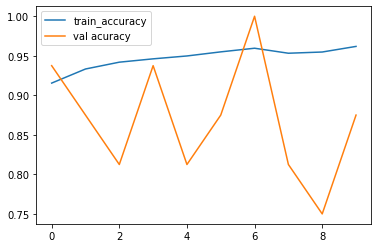

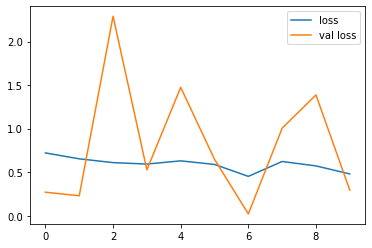

In [28]:
# Plotting the graph to see, accuracy, val_accuracy, loss and val_loss.
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val acuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()